# Flight Price Prediction Project:

## Submitted by :Prashant Shekhar 

STATEMENT: Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on

1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)
So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

## Importing datasets:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all rows
pd.set_option('display.max_rows',None)

In [3]:
#importing dataset
df = pd.read_csv("D:\Flightprice.csv") #Reading csv file
df.head()

,Unnamed: 0,Unnamed: 0.1,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,Spicejet,24-11-2021,Goa,Ahmedabad,8:15,10:25,Non stop,"? 5,315"
2,2,1,Spicejet,24-11-2021,Goa,Ahmedabad,21:05,23:00,Non stop,"? 5,315"
3,3,2,Go First,24-11-2021,Goa,Ahmedabad,14:00,18:35,1 stop via Bengaluru,"? 5,315"
4,4,3,Go First,24-11-2021,Goa,Ahmedabad,13:15,20:25,1 stop via Mumbai,"? 5,315"


Since Price is my target and it seems to be continuous feature so this perticular problem is Regression Problem.

## Features Information:

## Preprocessing and EDA:

In [7]:
#Checking shape of my dataset
df.shape

(5204, 10)

In [4]:
#Removing Column "Unnamed:0 as it will not affect our core dataset
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Unnamed: 0.1,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Spicejet,24-11-2021,Goa,Ahmedabad,8:15,10:25,Non stop,"? 5,315"
2,1,Spicejet,24-11-2021,Goa,Ahmedabad,21:05,23:00,Non stop,"? 5,315"
3,2,Go First,24-11-2021,Goa,Ahmedabad,14:00,18:35,1 stop via Bengaluru,"? 5,315"
4,3,Go First,24-11-2021,Goa,Ahmedabad,13:15,20:25,1 stop via Mumbai,"? 5,315"


Removing Unnamed: 0 column as it is the index column of csv file.

In [5]:
#Removing First row as it have only NaN values
df=df.drop([df.index[0]])

Since i am having all the entries in first row as nan so i have dropped this row.

In [6]:
#Equalizing Price column
df.Price = df.Price.str.replace('[^0-9.]','').astype('float64')
df.head()

,Unnamed: 0.1,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
1,0,Spicejet,24-11-2021,Goa,Ahmedabad,8:15,10:25,Non stop,5315.0
2,1,Spicejet,24-11-2021,Goa,Ahmedabad,21:05,23:00,Non stop,5315.0
3,2,Go First,24-11-2021,Goa,Ahmedabad,14:00,18:35,1 stop via Bengaluru,5315.0
4,3,Go First,24-11-2021,Goa,Ahmedabad,13:15,20:25,1 stop via Mumbai,5315.0
5,4,Go First,24-11-2021,Goa,Ahmedabad,6:40,20:25,1 stop via Mumbai,5315.0


I have changed the price column datatype to float.

In [11]:
#Checking all column names
df.columns

Index(['Unnamed: 0.1', 'Airline', 'Journey_date', 'From', 'To', 'Dtime',
       'Atime', 'Stops', 'Price'],
      dtype='object')

Above are the column names of the dataset.

In [12]:
#Checking the data types of all columns
df.dtypes

Unnamed: 0.1      int64
Airline          object
Journey_date     object
From             object
To               object
Dtime            object
Atime            object
Stops            object
Price           float64
dtype: object

Except Price all other columns are object type datas.But i have to convert journey_date, d_time and a_time columns from object to datetime type data.

In [7]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5203 entries, 1 to 5203
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  5203 non-null   int64  
 1   Airline       5203 non-null   object 
 2   Journey_date  5203 non-null   object 
 3   From          5203 non-null   object 
 4   To            5203 non-null   object 
 5   Dtime         5203 non-null   object 
 6   Atime         5203 non-null   object 
 7   Stops         5203 non-null   object 
 8   Price         5203 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 406.5+ KB


There is no nan values in the dataset.But i have to convert journey_date, d_time and a_time columns from object to datetime type data.

In [8]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

0     208
1     208
2     207
3     207
4     207
5     207
6     207
7     202
8     197
9     192
10    183
11    174
12    167
13    153
14    144
15    140
16    133
17    127
18    115
19    113
20    106
21     99
22     93
23     82
24     76
25     72
26     67
27     63
28     59
29     54
30     53
31     50
33     49
32     49
34     48
35     45
36     44
37     41
38     39
39     37
40     34
41     34
42     32
43     31
44     29
45     28
46     27
47     27
49     26
48     26
50     24
51     24
52     21
53     19
54     18
55     18
56     14
57     10
58      9
59      9
60      7
61      6
62      6
63      3
64      3
65      1
Name: Unnamed: 0.1, dtype: int64
****************************************
IndiGo                 1767
Go First               1457
AirAsia                 512
Air India               474
Spicejet                408
Vistara                 375
Spicejet, IndiGo         35
Air India, IndiGo        16
Spicejet, AirAsia        13
IndiGo, Air In

Above are the value counts of each column.In Airline and Stops column we have to use grouping to get better understanding on the feature.

In [9]:
#Grouping Airlines column for multiple airlines
df["Airline"].replace(("Spicejet, IndiGo","Air India, IndiGo","Spicejet, AirAsia","IndiGo, Air India","IndiGo, Spicejet","AirAsia, IndiGo","IndiGo, Go First","IndiGo, TruJet","Vistara, IndiGo","Spicejet, Air India","Air India, Go First","Vistara, Spicejet","Spicejet, Go First","Go First, IndiGo","IndiGo, AirAsia","Air India, AirAsia","Vistara, Go First","TruJet, IndiGo","Spicejet, Vistara","IndiGo, Vistara","Air India, Spicejet","AirAsia, Go First","Vistara, AirAsia","Vistara, Air India","Go First, AirAsia","Spicejet, TruJet","Vistara, TruJet","AirAsia, TruJet","Go First, Air India","Go First, Spicejet","Air India, Vistara"),"Multiple Airlines",inplace=True)


In [10]:
#Checking the value counts of Airline column
df.Airline.value_counts()

IndiGo               1767
Go First             1457
AirAsia               512
Air India             474
Spicejet              408
Vistara               375
Multiple Airlines     202
TruJet                  4
Star Air                4
Name: Airline, dtype: int64

In [11]:
#Grouping Stops column 
df["Stops"].replace(("1 stop via Mumbai","1 stop via Hyderabad","1 stop via Bengaluru","1 stop via New Delhi","1 stop via Ahmedabad","1 stop via Goa","1 stop via Pune","1 stop via Lucknow","1 stop via Ranchi","1 stop via Kolkata","1 stop via Chennai","1 stop via Chandigarh","1 stop via Kochi","1 stop via Jaipur","1 stop via Nagpur","1 stop via Amritsar","1 stop via Patna","1 stop via Surat","1 stop via Guwahati","1 stop via Vadodara","1 stop via Udaipur","1 stop via Indore","1 stop via Bhavnagar","1 stop via Madurai","1 stop via Bagdogra","1 stop via Varanasi","1 stop via Srinagar","1 stop via Mangalore","1 stop via Jammu","1 stop via Vijayawada","1 stop via Jodhpur","1 stop via Kalaburagi","1 stop via Aurangabad","1 stop via Rajkot","1 stop via Mysore","1 stop via Bhopal","1 stop via Tirupati","1 stop via Dehradun","1 stop via Visakhapatnam"),"1 Stop",inplace=True)


In [12]:
#Grouping Stops column
df["Stops"].replace(("2 stop via New Delhi,Hyderabad","2 stop via Hyderabad,New Delhi","2 stop via Mumbai,Hyderabad","2 stop via Mumbai,New Delhi","2 stop via Hyderabad,Mumbai","2 stop via Bengaluru,Hyderabad","2 stop via Hyderabad,Bengaluru","2 stop via New Delhi,Mumbai","2 stop via Varanasi,Bengaluru","2 stop via New Delhi,Chandigarh","2 stop via Chandigarh,New Delhi","2 stop via Chandigarh,Ahmedabad","2 stop via Ranchi,New Delhi","2 stop via Ranchi,Bengaluru","2 stop via Ahmedabad,Chandigarh","2 stop via Chandigarh,Srinagar","2 stop via Bengaluru,Ranchi","2 stop via Jammu,Srinagar","2 stop via Kochi,Mumbai","2 stop via New Delhi,Varanasi","2 stop via Hyderabad,Mysore","2 stop via Mumbai,Ranchi","2 stop via Chennai,Ranchi","2 stop via Hyderabad,Pune","2 stop via Nagpur,Pune","2 stop via Chennai,Hyderabad","2 stop via Pune,Hyderabad","2 stop via Hyderabad,Nanded","2 stop via Vijayawada,Hyderabad","2 stop via Hyderabad,Goa","2 stop via Nanded,Hyderabad","2 stop via Mumbai,Chandigarh","2 stop via Belgaum,Hyderabad","2 stop via Chennai,Jaipur","2 stop via Hyderabad,Chennai","2 stop via Hyderabad,Tirupati","2 stop via Srinagar,Chandigarh","2 stop via Mangalore,Mumbai","2 stop via Amritsar,Srinagar","2 stop via Goa,Hyderabad","2 stop via Mysore,Hyderabad"),"2 Stops",inplace=True)


In [13]:
#Grouping Stops column
df["Stops"].replace(("3 stop via Goa,New Delhi,Hyderabad","3 stop via Mumbai,Aurangabad,New Delhi","3 stop via Chandigarh,New Delhi,Ranchi","3 stop via New Delhi,Aurangabad,Mumbai","3 stop via Leh,Jammu,Srinagar","3 stop via Bhubaneswar,New Delhi,Hyderabad","3 stop via Hyderabad,New Delhi,Mumbai","3 stop via Indore,Hyderabad,Mumbai","3 stop via Hyderabad,New Delhi,Jaipur","3 stop via Hyderabad,New Delhi,Goa","3 stop via Ahmedabad,New Delhi,Hyderabad","3 stop via Belgaum,Hyderabad,Mumbai","3 stop via Hyderabad,New Delhi,Bhopal","3 stop via Mumbai,New Delhi,Hyderabad"),"3 Stops",inplace=True)


In [14]:
#Grouping Stops column
df["Stops"].replace(("4 stop via Bhubaneswar,Surat,New Delhi,Hyderabad"),"4 Stops",inplace=True)

In [15]:
#Checking the value counts of Stops column
df.Stops.value_counts()

1 Stop      2533
Non stop    2285
2 Stops      348
3 Stops       36
4 Stops        1
Name: Stops, dtype: int64

In [16]:
#Let me assign values for Stops column
df.replace({"Non stop": 0,"1 Stop": 1,"2 Stops": 2,"3 Stops": 3,"4 Stops": 4},inplace = True)

In [17]:
#Checking the value counts of Stops column again
df.Stops.value_counts()

1    2533
0    2285
2     348
3      36
4       1
Name: Stops, dtype: int64

Now Stops column is set for our analysis.

In [18]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Unnamed: 0.1    0
Airline         0
Journey_date    0
From            0
To              0
Dtime           0
Atime           0
Stops           0
Price           0
dtype: int64


I don't find any nan values in the dataset.

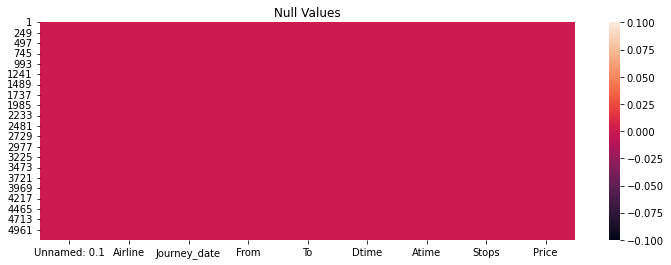

In [19]:
#Visualizeing null values
plt.figure(figsize=[12,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [21]:
#Checking for empty observations
df.loc[df['Price'] == " "]

,Unnamed: 0.1,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price


There is no empty observations in my target column.

## Feature Extraction:

In [22]:
#Converting object data type to datetime in Journey_date column 
df['Journey_date'] =  pd.to_datetime(df['Journey_date'])

In [23]:
#Extracting Journey year,month and day from Journey_date

#Extracting year
df["Journey_year"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.year

#Extracting month
df["Journey_mon"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.month

#Extracting day
df["Journey_day"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.day

In [24]:
#Checking valuecount of Journey_year column
df.Journey_year.value_counts()

2021    5203
Name: Journey_year, dtype: int64

Since all the entries in Journey_year column are same let's drop as it will not help in our core analysis.

In [25]:
#Droping Journey_year column
df = df.drop(["Journey_year"],axis=1)

In [26]:

#Checking valuecount of Journey_mon column
df.Journey_mon.value_counts()

11    5203
Name: Journey_mon, dtype: int64

Since all the entries in Journey_mon column are same let's drop as it will not help in our core analysis.

In [27]:
#Droping Journey_mon column
df = df.drop(["Journey_mon"],axis=1)

In [28]:
#Checking valuecount of Journey_year column
df.Journey_day.value_counts()

29    798
30    765
24    761
27    742
25    740
26    718
28    679
Name: Journey_day, dtype: int64

Now Journey_day is ready for our analysis.

In [29]:
#Droping Journey_date column
df = df.drop(["Journey_date"],axis=1)

Dropping Journey_date column after extracting requered information.

In [30]:
#Converting object data type to datetime 
df['Dtime'] =  pd.to_datetime(df['Dtime'])
df['Atime'] =  pd.to_datetime(df['Atime'])

In [31]:
#Checking the data types of all columns again
df.dtypes

Unnamed: 0.1             int64
Airline                 object
From                    object
To                      object
Dtime           datetime64[ns]
Atime           datetime64[ns]
Stops                    int64
Price                  float64
Journey_day              int64
dtype: object

The data type has changed now.

In [32]:
#Extracting hours and minutes from Dtime

#Extracting Hours
df["Dhour"]=pd.to_datetime(df["Dtime"]).dt.hour

#Extracting Hours
df["DMin"]=pd.to_datetime(df["Dtime"]).dt.minute

In [33]:
#Droping Dep_Time column after extraction
df = df.drop(["Dtime"],axis=1)

In [34]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["AHour"]=pd.to_datetime(df["Atime"]).dt.hour

#Extracting Hours
df["AMin"]=pd.to_datetime(df["Atime"]).dt.minute

In [35]:
#Droping Arrival_Time column after extraction
df = df.drop(["Atime"],axis=1)

In [36]:
#Checking the data types of all columns again
df.dtypes

Unnamed: 0.1      int64
Airline          object
From             object
To               object
Stops             int64
Price           float64
Journey_day       int64
Dhour             int64
DMin              int64
AHour             int64
AMin              int64
dtype: object

This is the datatypes after extraction and preprocessing.

In [37]:
#Checking description of data set
df.describe()

,Unnamed: 0.1,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
count,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000
mean,16.700557,0.642130,6846.891601,27.017106,12.517970,24.955795,13.152989,27.685950
std,14.133144,0.638332,2509.772290,2.022627,6.335777,18.153357,6.832345,16.896847
min,0.000000,0.000000,3429.000000,24.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,5114.000000,25.000000,7.000000,10.000000,8.000000,10.000000
50%,13.000000,1.000000,5955.000000,27.000000,12.000000,25.000000,13.000000,30.000000
75%,24.000000,1.000000,7624.000000,29.000000,18.000000,40.000000,19.000000,40.000000
max,65.000000,4.000000,31147.000000,30.000000,23.000000,55.000000,23.000000,55.000000



Above is the statistics about the dataset.The mean and the 2nd quantile values are almost same so there is no extreme outliers in the dataset.

## Visualization:

## Univariate Analysis:

In [38]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'From', 'To']


Above are the categorical columns in the data set.

In [39]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Unnamed: 0.1', 'Stops', 'Price', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']


Above are the numerical columns in the data set.

## Univariate analysis for numerical columns:

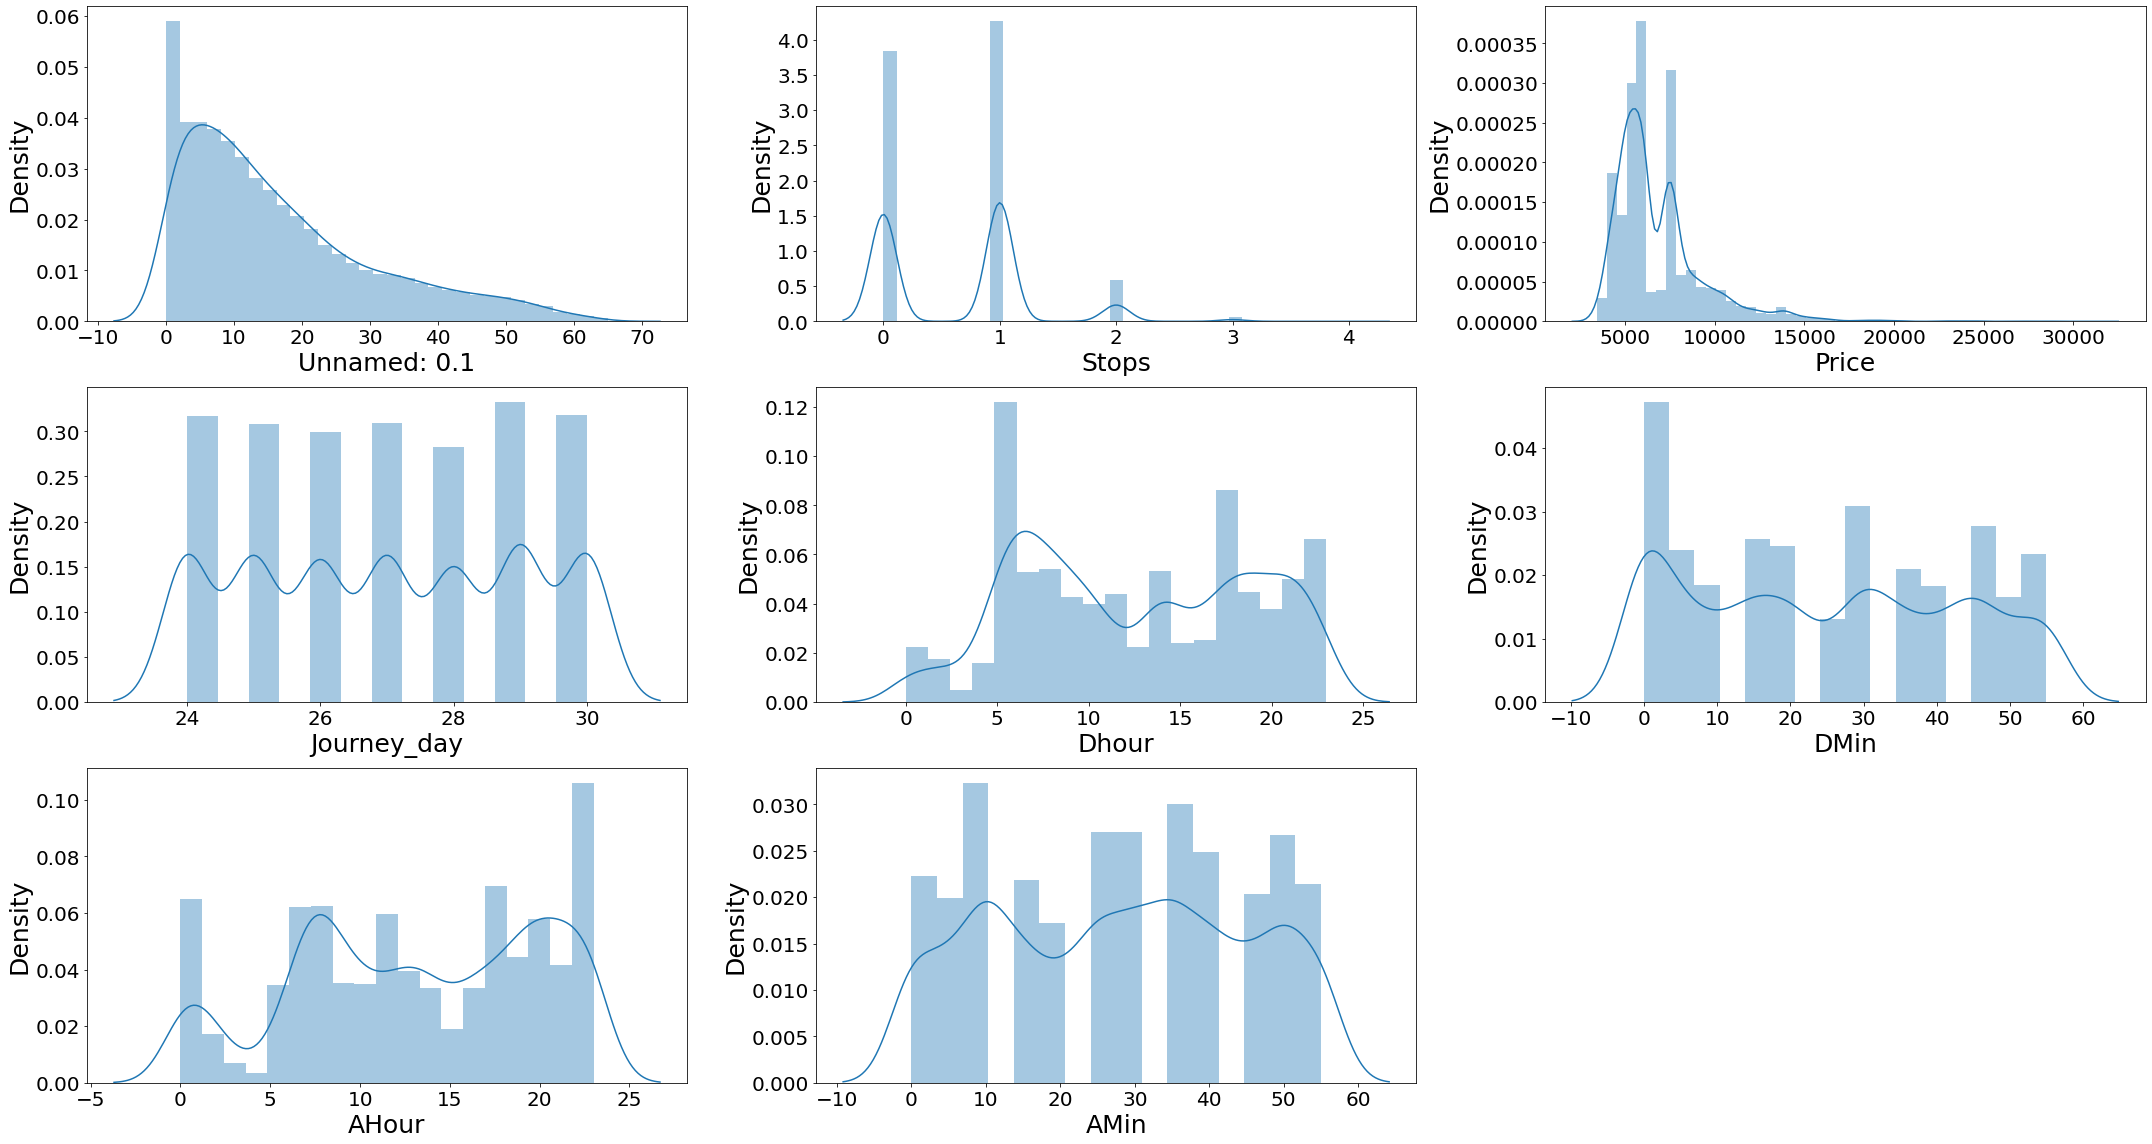

In [40]:
#Distribution plot for all numerical columns
plt.figure(figsize = (30,16))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
        plt.xticks(fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

There is no skewness in any of the numerical columns.

## Univariate Analysis for categorical columns:

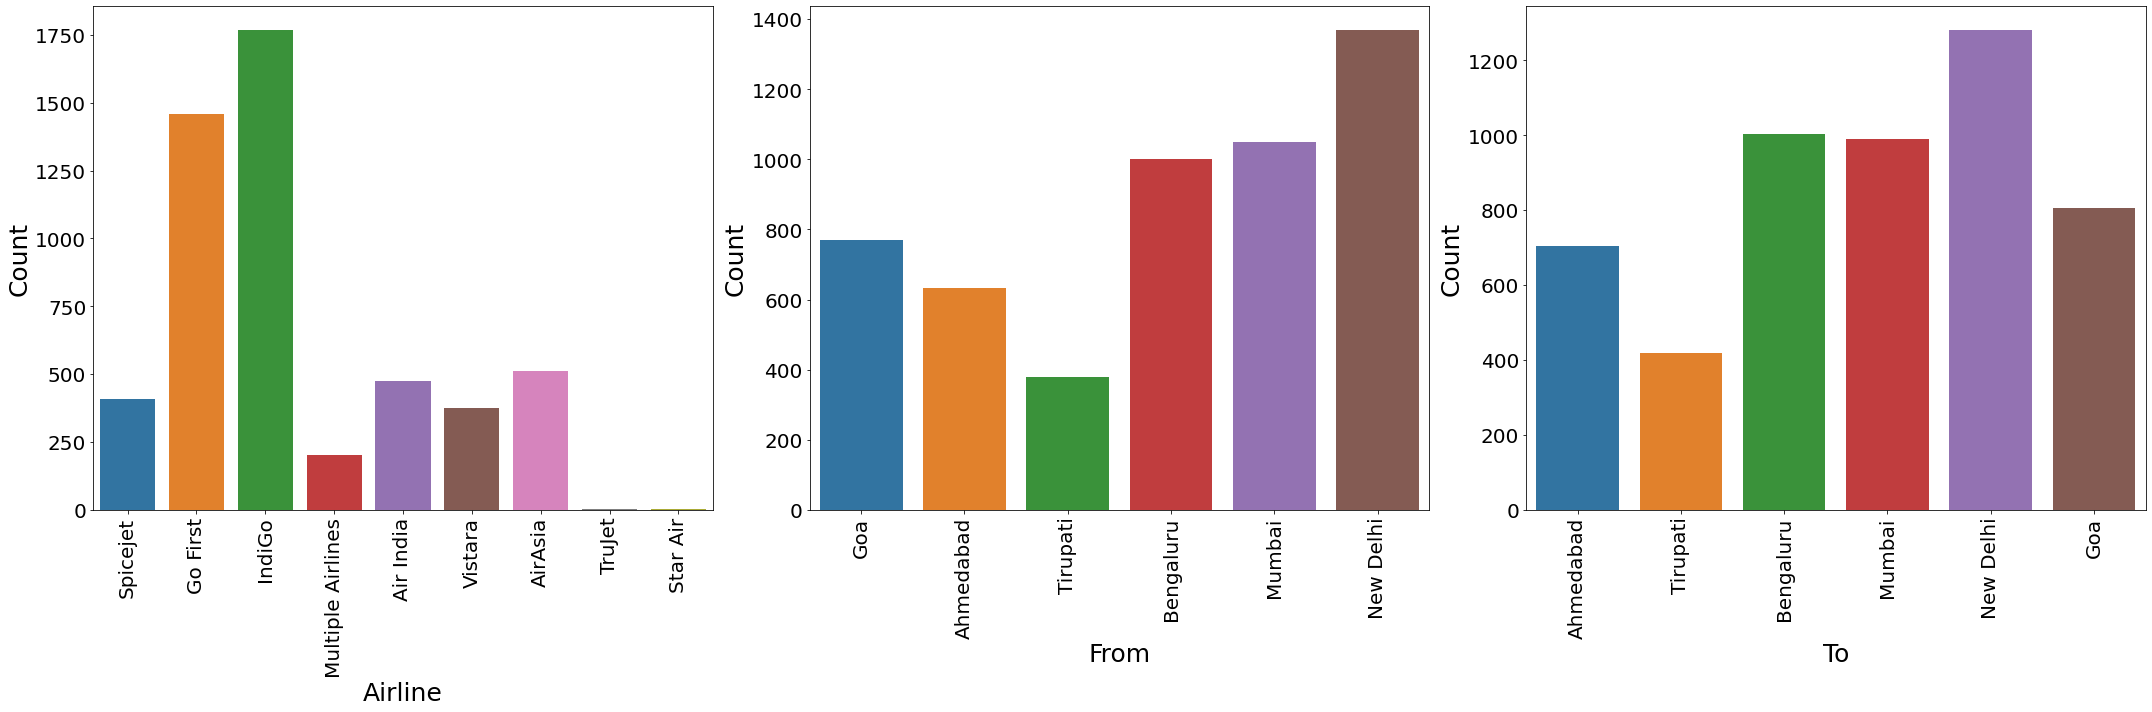

In [41]:
#Bar plot for all Categorical columns
plt.figure(figsize = (30,10))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Count',fontsize = 25)
        plt.xticks(rotation=90,fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Bivariate Analysis:

In [42]:
col=['Stops', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']

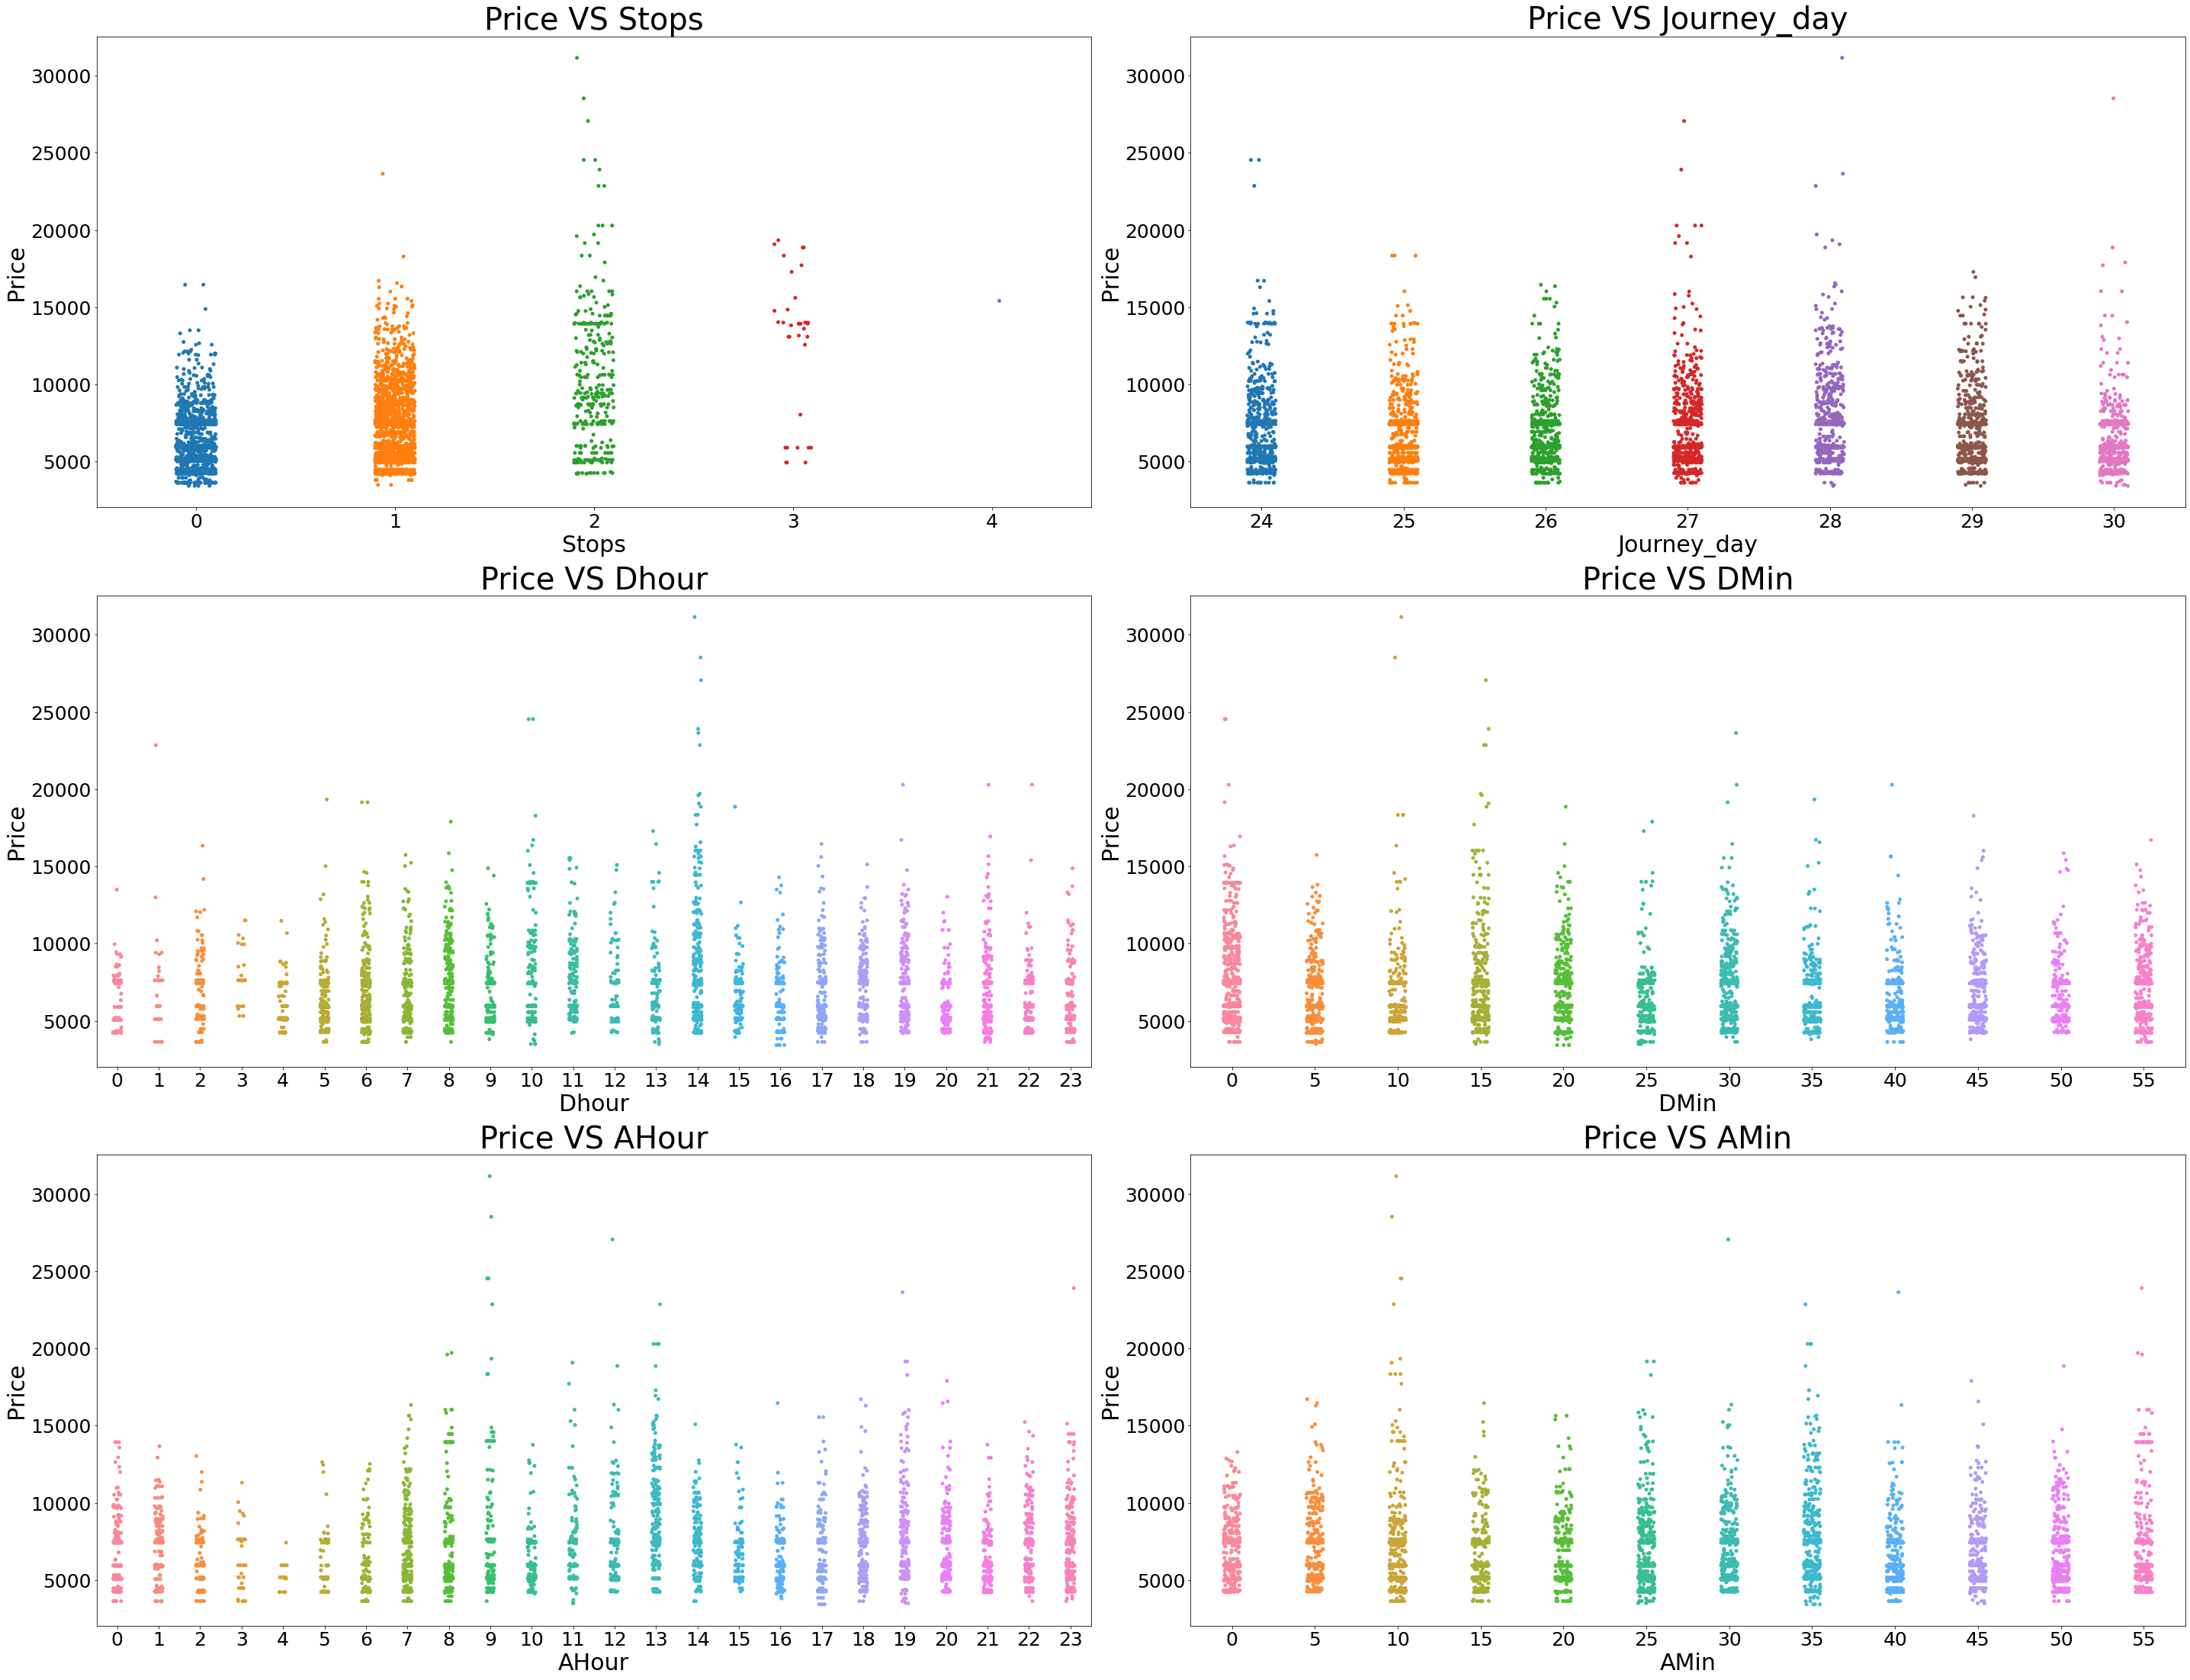

In [44]:
#stripplot for numerical columns
plt.figure(figsize=(40,40))
for i in range(len(col)):
    plt.subplot(4,2,i+1)
    sns.stripplot(x=df[col[i]] , y=df['Price'])
    plt.title(f"Price VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=25)  
    plt.yticks(fontsize=25)
    plt.xlabel(col[i],fontsize = 30)
    plt.ylabel('Price',fontsize = 30)
    plt.tight_layout()

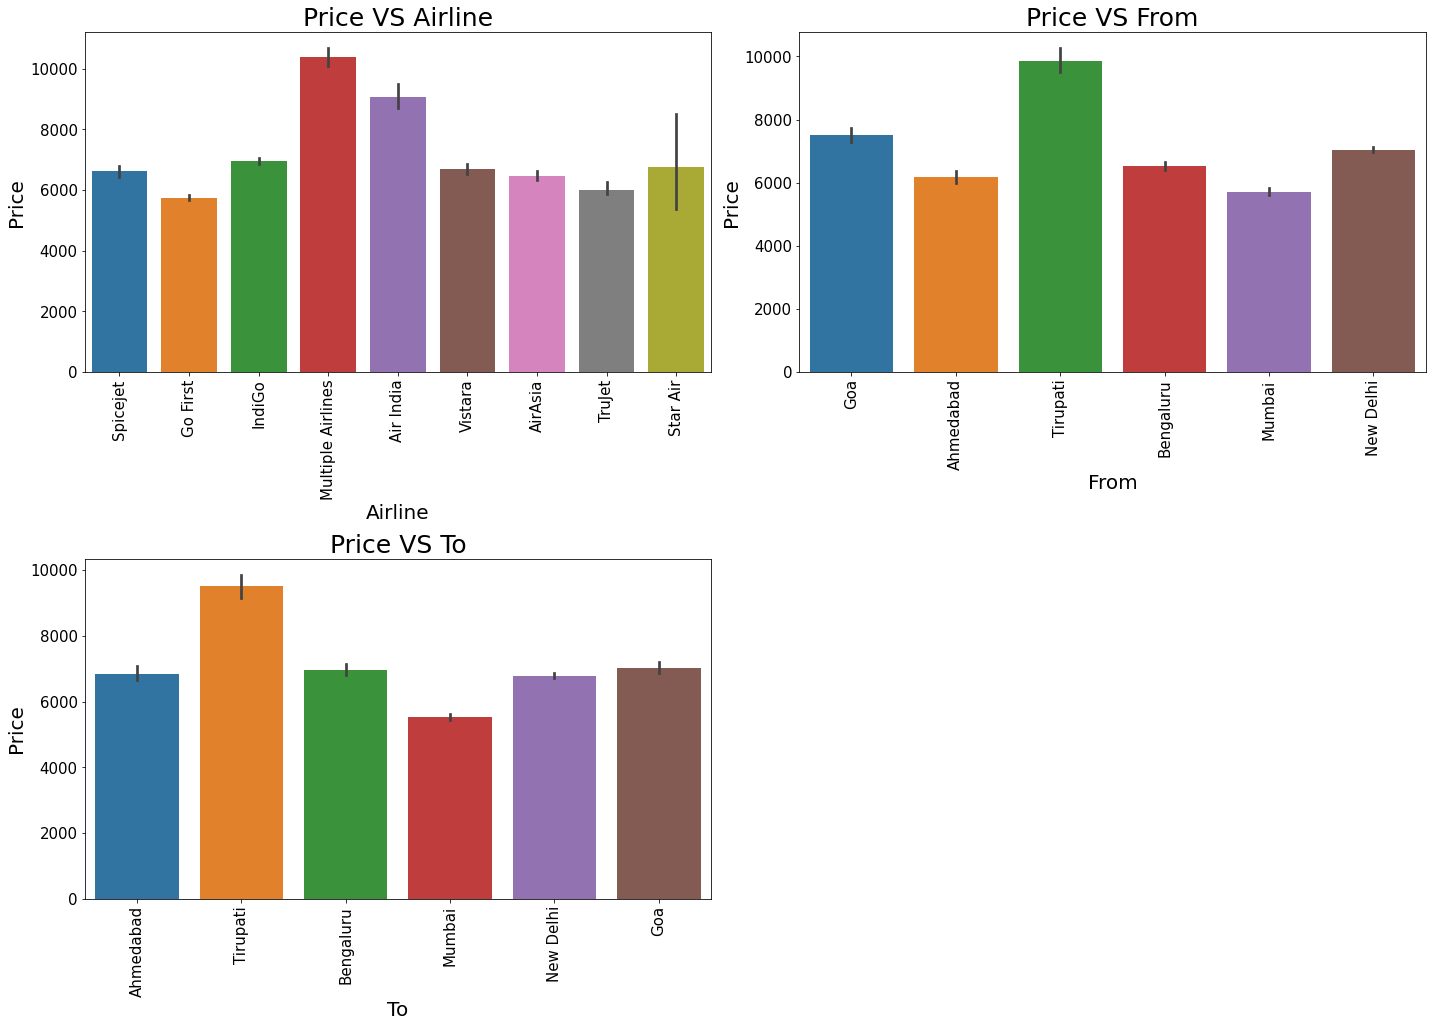

In [45]:
#Bar plot for all categorical columns
plt.figure(figsize=(20,20))
for i in range(len(categorical_columns)):
    plt.subplot(3,2,i+1)
    sns.barplot(y=df['Price'],x=df[categorical_columns[i]])
    plt.title(f"Price VS {categorical_columns[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=15)  
    plt.yticks(rotation=0,fontsize=15)
    plt.xlabel(categorical_columns[i],fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.tight_layout()

## Multivariate Analysis:

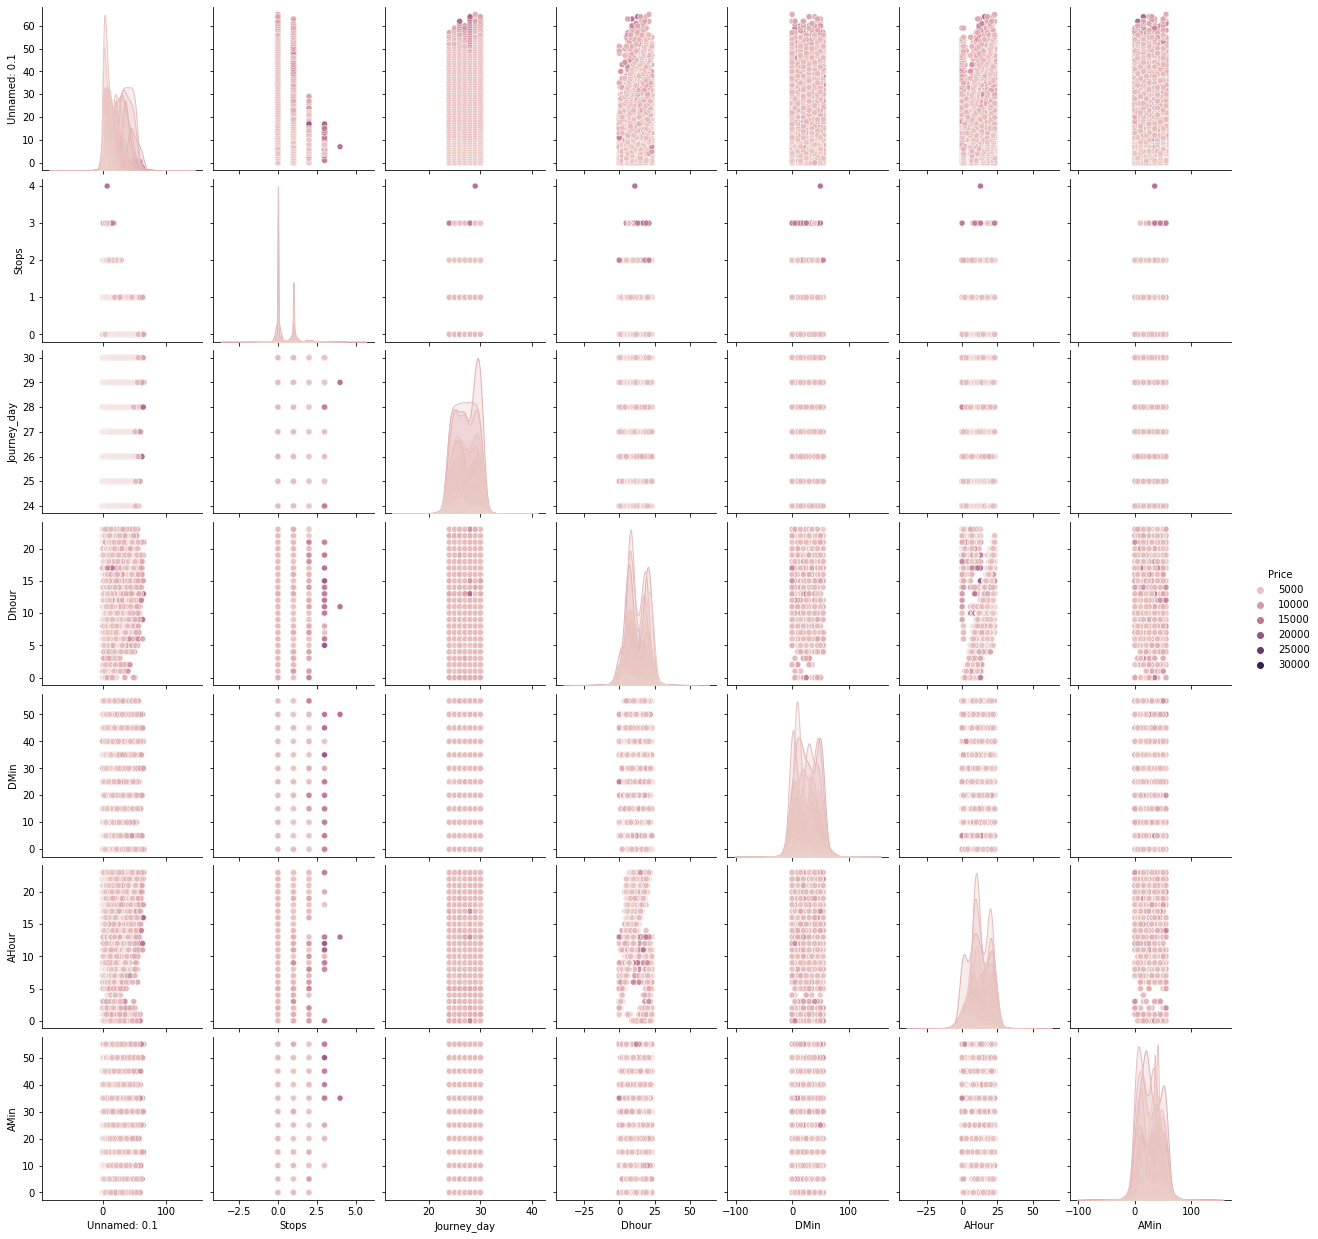

In [46]:
#pair ploting for df
sns.pairplot(df,hue="Price")


Above are the pair plots of each pair of features.

## Checking for outliers:

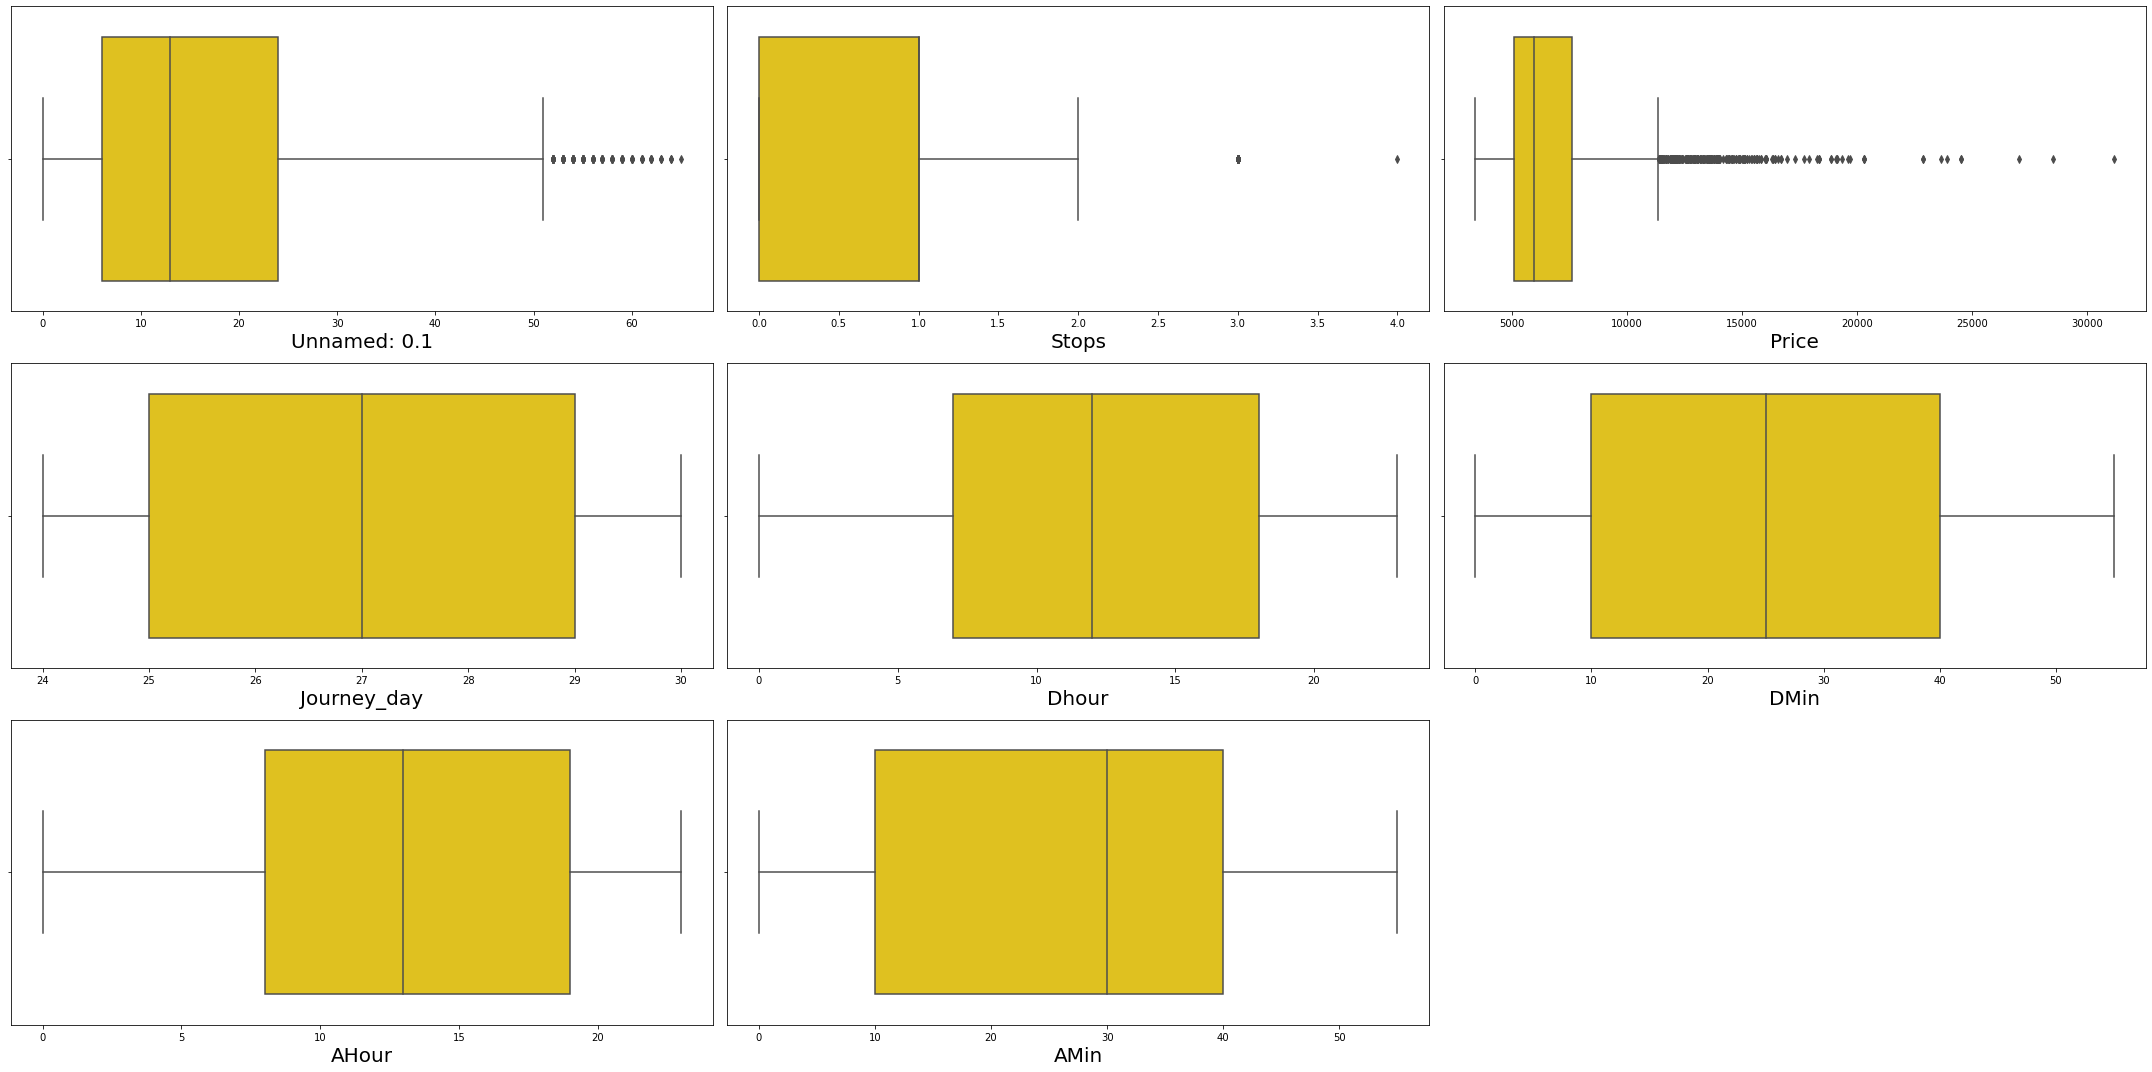

In [47]:
# Identifying the outliers using boxplot

plt.figure(figsize=(30,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Checking for skewness:

In [48]:
#Checking for skewness
df.skew()

Unnamed: 0.1    1.070877
Stops           0.659618
Price           2.166729
Journey_day    -0.012994
Dhour           0.015868
DMin            0.107587
AHour          -0.250471
AMin           -0.027810
dtype: float64

There is skewness in Stops and Price.Since Price is my target i should not remove skewness in that column since i don't want my target to get manupulated. And Stops is categorical column so i should not remove skewness here also.

## Label Encoding:

In [50]:
# Separating categorical columns in df_1
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'From', 'To']


Above are the list of categorical columns in df.

In [51]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)

In [52]:
df.head()

,Unnamed: 0.1,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
1,0,5,2,0,0,5315.0,24,8,15,10,25
2,1,5,2,0,0,5315.0,24,21,5,23,0
3,2,2,2,0,1,5315.0,24,14,0,18,35
4,3,2,2,0,1,5315.0,24,13,15,20,25
5,4,2,2,0,1,5315.0,24,6,40,20,25


Using label encoder i have encoded the categorical columns.

## Checking correlation using heat map:

In [53]:
cor=df.corr()

Checking correlation.

In [54]:

cor

,Unnamed: 0.1,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
Unnamed: 0.1,1.000000,0.252444,0.113269,0.057185,-0.398068,0.122042,0.032115,0.117891,0.059519,0.042277,-0.009080
Airline,0.252444,1.000000,0.068539,0.025962,-0.258423,-0.039616,0.002134,-0.044661,0.184257,0.036837,-0.049054
From,0.113269,0.068539,1.000000,-0.236589,0.051194,0.200997,-0.013849,-0.048770,-0.051594,0.068208,-0.024735
To,0.057185,0.025962,-0.236589,1.000000,0.045298,0.086125,0.019675,-0.075469,0.012290,0.022515,-0.015172
Stops,-0.398068,-0.258423,0.051194,0.045298,1.000000,0.372672,-0.006573,-0.059203,-0.084063,0.042220,0.028093
Price,0.122042,-0.039616,0.200997,0.086125,0.372672,1.000000,-0.041830,-0.018444,-0.049541,0.009203,0.004333
Journey_day,0.032115,0.002134,-0.013849,0.019675,-0.006573,-0.041830,1.000000,-0.002312,-0.010398,0.010633,0.026470
Dhour,0.117891,-0.044661,-0.048770,-0.075469,-0.059203,-0.018444,-0.002312,1.000000,0.016069,0.112732,0.017932
DMin,0.059519,0.184257,-0.051594,0.012290,-0.084063,-0.049541,-0.010398,0.016069,1.000000,-0.008772,-0.077638
AHour,0.042277,0.036837,0.068208,0.022515,0.042220,0.009203,0.010633,0.112732,-0.008772,1.000000,-0.021302


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

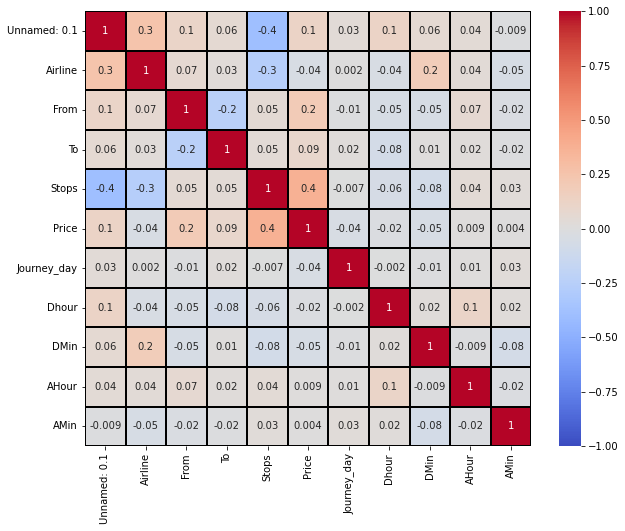

In [55]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

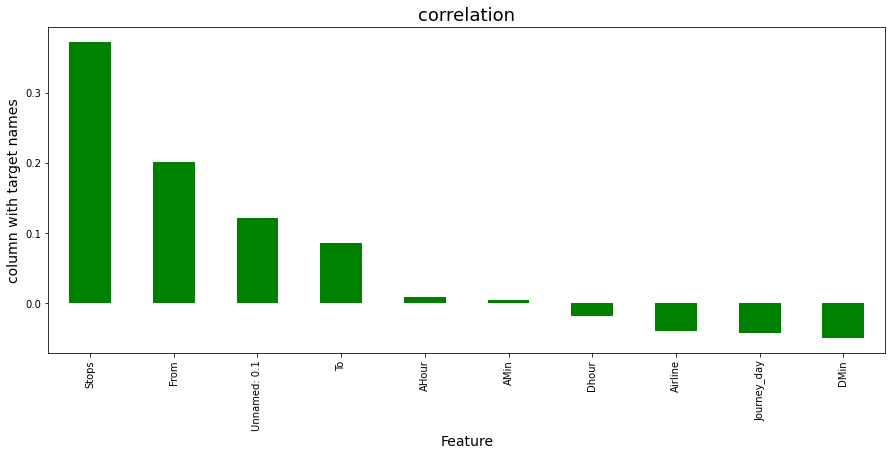

In [56]:
plt.figure(figsize=(15,6))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

AMin is very less correlated with target.

## Separating features and label in train dataset:

In [57]:
x = df.drop("Price",axis=1)
y = df["Price"]

I have separated my target and independent columns.

## Scaling the data using standard scaler:

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using standard scaler.

In [59]:
X.head()

,Unnamed: 0.1,Airline,From,To,Stops,Journey_day,Dhour,DMin,AHour,AMin
0,-1.181773,1.148553,-0.334434,-1.581111,-1.006046,-1.49182,-0.713157,-0.548480,-0.461524,-0.158977
1,-1.111010,1.148553,-0.334434,-1.581111,-1.006046,-1.49182,1.338880,-1.099395,1.441373,-1.638685
2,-1.040248,-0.425715,-0.334434,-1.581111,0.560688,-1.49182,0.233937,-1.374853,0.709490,0.432906
3,-0.969485,-0.425715,-0.334434,-1.581111,0.560688,-1.49182,0.076088,-0.548480,1.002243,-0.158977
4,-0.898723,-0.425715,-0.334434,-1.581111,0.560688,-1.49182,-1.028855,0.828808,1.002243,-0.158977


This is the data of independent variables after scaling.

## Checking for multicolinearity issue using VIF:

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.287331,Unnamed: 0.1
1,1.152176,Airline
2,1.119445,From
3,1.094184,To
4,1.265346,Stops
5,1.002576,Journey_day
6,1.050360,Dhour
7,1.046913,DMin
8,1.027147,AHour
9,1.010315,AMin


There is no multicolinearity issue in this dataset.

## Finding Best Random State and Accuracy:

In [62]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [63]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8754815894264061  on Random_state  41


I got the best accuracy and random state.

In [64]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

## Regression Algorithms:

In [65]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

## i) RandomForestRegressor:

In [66]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 87.18777542505566
mean_squared_error: 743587.6009078795
mean_absolute_error: 436.3204228058937
root_mean_squared_error: 862.3152561029403


## ii) XGB Regressor:

In [67]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 87.28809942861658
mean_squared_error: 737765.0612946409
mean_absolute_error: 486.5161311108664
root_mean_squared_error: 858.9325126543068


## iii) ExtraTreeRegressor:

In [68]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8811074903082672
mean_squared_error: 690020.6559014095
mean_absolute_error: 399.9588020499679
root_mean_squared_error: 830.6748195903193


## iv) Gradient Boosting Regressor:

In [69]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7797199697061152
mean_squared_error: 1278446.988624195
mean_absolute_error: 798.9378039311342
root_mean_squared_error: 1130.684301042601


## v) DecisionTreeRegressor:

In [70]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7358640505083696
mean_squared_error: 1532975.135169763
mean_absolute_error: 476.5970531710442
root_mean_squared_error: 1238.1337307293436


## vi) KNN:

In [71]:

knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6139782730525183
mean_squared_error: 2240367.924868674
mean_absolute_error: 941.0667520819987
root_mean_squared_error: 1496.7858647343894


## vii) Bagging Regressor:

In [73]:

BG=BaggingRegressor()
BG.fit(X_train,y_train)
pred=BG.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8497119427547121
mean_squared_error: 872232.103632287
mean_absolute_error: 448.9034593209481
root_mean_squared_error: 933.9336719662093


By looking into the model r2_score and error i found ExtraTreesRegressor as the best model with highest r2_score and least errors.

## Hyper Parameter Tuning:

In [78]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [79]:
parameter = {'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4],
             'n_estimators':[20,40,60,80,100],
             'min_samples_leaf':[1,2,3,4,5],
              'n_jobs':[-2,-1,1,2]}

Giving ETR parameters.

In [80]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

Running grid search CV for ETR.

In [ ]:
GCV.fit(X_train,y_train)

In [ ]:
Tunning the model using GCV.